<a href="https://colab.research.google.com/github/Madina06/power-grid-anomaly-detection/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DF

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###1) generated_data_AEP_hour (timestamp60	consumption	label	seq_name)
2004-10-01 01:00:00 - 2006-01-01 00:00:00

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/ml_dataset/generated_data_AEP_hour.csv') # , sep=';')

### Merged(Result)

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

dataset_name = "generated_data_AEP_hour"
df = pd.read_csv(f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv')

features = df.drop(['label', 'timestamp', 'seq_name'], axis=1)
target = df['label']

target = label_encoder.fit_transform(target)

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

timesteps = 1
X_train_lstm = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])

results = []

### ---- LSTM Model ---- ###
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(units=50),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_lstm, y_train, epochs=12, batch_size=32, verbose=1)

loss_lstm, accuracy_lstm = model.evaluate(X_test_lstm, y_test, verbose=1)
results.append(f"ALGORITHM=LSTM, DATASET={dataset_name}, Accuracy={accuracy_lstm:.4f}")

### ---- Decision Tree Model ---- ###
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
results.append(f"ALGORITHM=DecisionTree, DATASET={dataset_name}, Accuracy={accuracy_tree:.4f}")

### ---- Random Forest Model ---- ###
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
results.append(f"ALGORITHM=RandomForest, DATASET={dataset_name}, Accuracy={accuracy_rf:.4f}")

### ---- Grid Search for Random Forest ---- ###
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_rf_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
results.append(f"ALGORITHM=BestRandomForest, DATASET={dataset_name}, Accuracy={accuracy_best_rf:.4f}")

print(f"Best parameters: {best_rf_params}")

save_directory = "/content/drive/My Drive/Results_of_colab"
os.makedirs(save_directory, exist_ok=True)
file_path = os.path.join(save_directory, "result_of_first_dataset.txt")

with open(file_path, "w") as file:
    file.write("\n".join(results))

print(f"Model summary saved at: {file_path}")


for line in results:
    print(line)

df_features = df.drop(['label', 'timestamp', 'seq_name'], axis=1)
df_scaled_features = scaler.transform(df_features)
df_predictions = best_rf_model.predict(df_scaled_features)
df_predicted_labels = label_encoder.inverse_transform(df_predictions)
df['predicted_label'] = df_predicted_labels
print(df.head())


Epoch 1/12


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8736 - loss: 0.6725
Epoch 2/12
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9307 - loss: 0.3081
Epoch 3/12
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9302 - loss: 0.3066
Epoch 4/12
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9312 - loss: 0.3024
Epoch 5/12
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9310 - loss: 0.3031
Epoch 6/12
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9308 - loss: 0.3042
Epoch 7/12
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9301 - loss: 0.3047
Epoch 8/12
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9310 - loss: 0.3027
Epoch 9/12
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9303 - loss: 0.3041
Epoch 10/12
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9315 - loss: 0.3005
Epoch 11/12
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9312 - loss: 0.3012
Epoch 12/12
3500/3500 ━━━━━━━━

### ! Result with original dataset(all metrics)

Epoch 1/12


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8711 - loss: 0.6871
Epoch 2/12
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9309 - loss: 0.3068
Epoch 3/12
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9302 - loss: 0.3065
Epoch 4/12
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9314 - loss: 0.3021
Epoch 5/12
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9309 - loss: 0.3015
Epoch 6/12
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9320 - loss: 0.2987
Epoch 7/12
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9331 - loss: 0.2956
Epoch 8/12
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9302 - loss: 0.3047
Epoch 9/12
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9313 - loss: 0.3011
Epoch 10/12
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9316 - loss: 0.2998
Epoch 11/12
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9307 - loss: 0.3032
Epoch 12/12
3500/3500 ━━━━━━━━

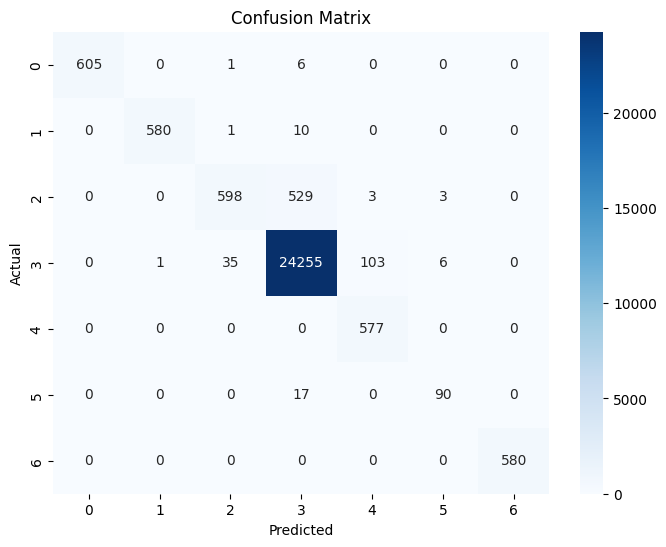

Model summary saved at: /content/drive/My Drive/Results_of_colab/result_of_first_dataset_with_new_metrics.txt
ALGORITHM=LSTM, DATASET=generated_data_AEP_hour, Accuracy=0.9336
ALGORITHM=DecisionTree, DATASET=generated_data_AEP_hour, Accuracy=0.9745
ALGORITHM=RandomForest, DATASET=generated_data_AEP_hour, Accuracy=0.9744
ALGORITHM=BestRandomForest, DATASET=generated_data_AEP_hour, Accuracy=0.9575
             timestamp  consumption   label  \
0  2004-12-31 01:00:00      13478.0  normal   
1  2004-12-31 02:00:00      12865.0  normal   
2  2004-12-31 03:00:00      12577.0  normal   
3  2004-12-31 04:00:00      12517.0  normal   
4  2004-12-31 05:00:00      12670.0  normal   

                                  seq_name predicted_label  
0  AEP_hourly_batch1#load-increase@100@180          normal  
1  AEP_hourly_batch1#load-increase@100@180          normal  
2  AEP_hourly_batch1#load-increase@100@180          normal  
3  AEP_hourly_batch1#load-increase@100@180          normal  
4  AEP_hourly_

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

dataset_name = "generated_data_AEP_hour"
df = pd.read_csv(f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv')

features = df.drop(['label', 'timestamp', 'seq_name'], axis=1)
target = df['label']

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

timesteps = 1
X_train_lstm = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])

results = []

### ---- LSTM Model ---- ###
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(units=50),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_lstm, y_train, epochs=12, batch_size=32, verbose=1)

loss_lstm, accuracy_lstm = model.evaluate(X_test_lstm, y_test, verbose=1)
results.append(f"ALGORITHM=LSTM, DATASET={dataset_name}, Accuracy={accuracy_lstm:.4f}")

### ---- Decision Tree Model ---- ###
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
results.append(f"ALGORITHM=DecisionTree, DATASET={dataset_name}, Accuracy={accuracy_tree:.4f}")

### ---- Random Forest Model ---- ###
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
results.append(f"ALGORITHM=RandomForest, DATASET={dataset_name}, Accuracy={accuracy_rf:.4f}")

### ---- Grid Search for Random Forest ---- ###
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_rf_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
results.append(f"ALGORITHM=BestRandomForest, DATASET={dataset_name}, Accuracy={accuracy_best_rf:.4f}")

print(f"Best parameters: {best_rf_params}")

precision = precision_score(y_test, y_pred_tree, average='weighted')
recall = recall_score(y_test, y_pred_tree, average='weighted')
f1 = f1_score(y_test, y_pred_tree, average='weighted')
cm = confusion_matrix(y_test, y_pred_tree)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{cm}\n\n")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

save_directory = "/content/drive/My Drive/Results_of_colab"
os.makedirs(save_directory, exist_ok=True)  # Ensure the directory exists
file_path = os.path.join(save_directory, "result_of_first_dataset_with_new_metrics.txt")

with open(file_path, "w") as file:
    file.write("\n".join(results))

print(f"Model summary saved at: {file_path}")

for line in results:
    print(line)

df_features = df.drop(['label', 'timestamp', 'seq_name'], axis=1)
df_scaled_features = scaler.transform(df_features)
df_predictions = best_rf_model.predict(df_scaled_features)

df_predicted_labels = label_encoder.inverse_transform(df_predictions)
df['predicted_label'] = df_predicted_labels

print(df.head())


### Merged in one coomon(previous 2)

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

dataset_name = "generated_data_Household"

df = pd.read_csv(f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv')
df = df.sort_values(by='timestamp')

features = df.drop(['label', 'timestamp', 'seq_name'], axis=1)
target = df['label']

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

timesteps = 1
X_train_lstm = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])

results = []

### ---- LSTM Model ---- ###
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(units=50),
    Dense(units=len(label_encoder.classes_), activation='softmax')  # Output layer with softmax activation
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_lstm, y_train, epochs=12, batch_size=32, verbose=1)

loss_lstm, accuracy_lstm = model.evaluate(X_test_lstm, y_test, verbose=1)
results.append(f"ALGORITHM=LSTM, DATASET={dataset_name}, Accuracy={accuracy_lstm:.4f}")

save_directory = "/content/drive/My Drive/Results_of_colab"
os.makedirs(save_directory, exist_ok=True)
file_path = os.path.join(save_directory, "result_of_second_dataset_original.txt")

with open(file_path, "w") as file:
    file.write("\n".join(results))

print(f"Model summary saved at: {file_path}")

for line in results:
    print(line)
df_features = df.drop(['label', 'timestamp', 'seq_name'], axis=1)
df_scaled_features = scaler.transform(df_features)
df_reshaped = df_scaled_features.reshape(df_scaled_features.shape[0], timesteps, df_scaled_features.shape[1])

df_predictions = model.predict(df_reshaped)
df_predicted_labels = label_encoder.inverse_transform(np.argmax(df_predictions, axis=1))

df['predicted_label'] = df_predicted_labels

print(df.head())


Epoch 1/12


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21000/21000 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - accuracy: 0.9556 - loss: 0.2921
Epoch 2/12
21000/21000 ━━━━━━━━━━━━━━━━━━━━ 75s 4ms/step - accuracy: 0.9565 - loss: 0.2288
Epoch 3/12
21000/21000 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.9615 - loss: 0.2146
Epoch 4/12
21000/21000 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.9637 - loss: 0.1949
Epoch 5/12
21000/21000 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.9643 - loss: 0.1893
Epoch 6/12
21000/21000 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - accuracy: 0.9649 - loss: 0.1879
Epoch 7/12
21000/21000 ━━━━━━━━━━━━━━━━━━━━ 74s 4ms/step - accuracy: 0.9649 - loss: 0.1878
Epoch 8/12
21000/21000 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.9649 - loss: 0.1869
Epoch 9/12
21000/21000 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - accuracy: 0.9654 - loss: 0.1849
Epoch 10/12
21000/21000 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - accuracy: 0.9654 - loss: 0.1848
Epoch 11/12
21000/21000 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - accuracy: 0.9656 - loss: 0.1835
Epoch 12

##### Fillna + LSTM

Fillna - https://www.w3schools.com/python/pandas/ref_df_fillna.asp

In [ ]:
df_2_1['delta'] = df_2_1['delta'].fillna(0)
df_2_1.head()

,timestamp,consumption,label,seq_name,delta
0,2006-12-16 17:24:00,4.216,normal,household_100k_batch1#load-increase@100@1000,0.000
1,2006-12-16 17:25:00,5.360,normal,household_100k_batch1#load-increase@100@1000,1.144
2,2006-12-16 17:26:00,5.374,normal,household_100k_batch1#load-increase@100@1000,0.014
3,2006-12-16 17:27:00,5.388,normal,household_100k_batch1#load-increase@100@1000,0.014
4,2006-12-16 17:28:00,3.666,normal,household_100k_batch1#load-increase@100@1000,-1.722


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

features = df_2_1.drop(['label', 'timestamp', 'seq_name'], axis=1)
target = df_2_1['label']

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

timesteps = 1
X_train = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=len(label_encoder.classes_), activation='softmax')) # Output layer with num_classes neurons and softmax activation

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Use sparse_categorical_crossentropy for integer labels

model.fit(X_train, y_train, epochs=10, batch_size=32) # Adjust epochs and batch size as needed

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

y_pred = model.predict(X_test)

y_pred_labels = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21000/21000 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - accuracy: 0.9542 - loss: 0.2919
Epoch 2/10
21000/21000 ━━━━━━━━━━━━━━━━━━━━ 76s 4ms/step - accuracy: 0.9574 - loss: 0.2240
Epoch 3/10
21000/21000 ━━━━━━━━━━━━━━━━━━━━ 77s 4ms/step - accuracy: 0.9619 - loss: 0.2136
Epoch 4/10
21000/21000 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - accuracy: 0.9635 - loss: 0.1955
Epoch 5/10
21000/21000 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - accuracy: 0.9644 - loss: 0.1886
Epoch 6/10
21000/21000 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.9645 - loss: 0.1888
Epoch 7/10
21000/21000 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - accuracy: 0.9653 - loss: 0.1848
Epoch 8/10
21000/21000 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - accuracy: 0.9654 - loss: 0.1818
Epoch 9/10
21000/21000 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - accuracy: 0.9653 - loss: 0.1792
Epoch 10/10
21000/21000 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.9659 - loss: 0.1742
5250/5250 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9662 - loss: 0.1697
Test Loss: 0.170821562

#### Gradient boosting

Gradient Boosting Accuracy: 0.9667083333333333
             timestamp  consumption   label  \
0  2006-12-16 17:24:00        4.216  normal   
1  2006-12-16 17:25:00        5.360  normal   
2  2006-12-16 17:26:00        5.374  normal   
3  2006-12-16 17:27:00        5.388  normal   
4  2006-12-16 17:28:00        3.666  normal   

                                       seq_name predicted_label  
0  household_100k_batch1#load-increase@100@1000          normal  
1  household_100k_batch1#load-increase@100@1000          normal  
2  household_100k_batch1#load-increase@100@1000          normal  
3  household_100k_batch1#load-increase@100@1000          normal  
4  household_100k_batch1#load-increase@100@1000          normal  
Precision: 0.9800775730352389
Recall: 0.9822083333333333
F1-score: 0.980067468074781
Confusion Matrix:
[[   702     50    110    343      0      2      0]
 [    27    504     92    563      0      3      0]
 [   125    111   1209    946      0      3      1]
 [     7     22

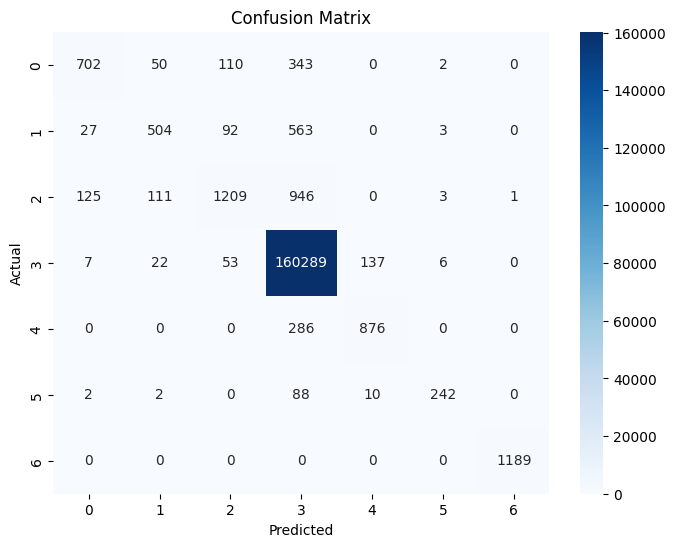

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

df_ = df_2.copy()

features = df_.drop(['label', 'timestamp', 'seq_name'], axis=1)
target = df_['label']

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")

df_features = df_.drop(['label', 'timestamp', 'seq_name'], axis=1)
df_scaled_features = scaler.transform(df_features)
df_predictions = gb_clf.predict(df_scaled_features)

df_predicted_labels = label_encoder.inverse_transform(df_predictions)

df_['predicted_label'] = df_predicted_labels

print(df_.head())


# ----------------------
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

precision = precision_score(y_test, y_pred_tree, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred_tree, average='weighted')
f1 = f1_score(y_test, y_pred_tree, average='weighted')
cm = confusion_matrix(y_test, y_pred_tree)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{cm}\n\n")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



#### Xgboost

XGBoost Accuracy: 0.9629702380952381
             timestamp  consumption   label  \
0  2006-12-16 17:24:00        4.216  normal   
1  2006-12-16 17:25:00        5.360  normal   
2  2006-12-16 17:26:00        5.374  normal   
3  2006-12-16 17:27:00        5.388  normal   
4  2006-12-16 17:28:00        3.666  normal   

                                       seq_name predicted_label_xgb  
0  household_100k_batch1#load-increase@100@1000              normal  
1  household_100k_batch1#load-increase@100@1000              normal  
2  household_100k_batch1#load-increase@100@1000              normal  
3  household_100k_batch1#load-increase@100@1000              normal  
4  household_100k_batch1#load-increase@100@1000              normal  
Precision: 0.9800775730352389
Recall: 0.9822083333333333
F1-score: 0.980067468074781
Confusion Matrix:
[[   702     50    110    343      0      2      0]
 [    27    504     92    563      0      3      0]
 [   125    111   1209    946      0      3      1]
 

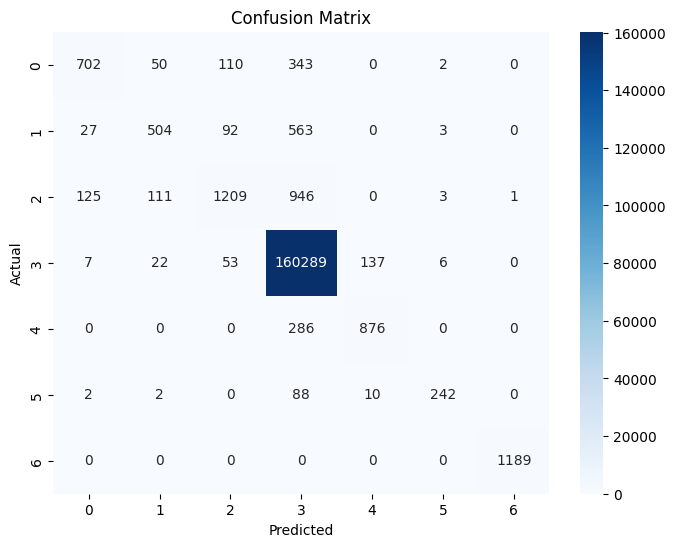

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

features = df_2.drop(['label', 'timestamp', 'seq_name'], axis=1)
target = df_2['label']

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

df_features = df_2.drop(['label', 'timestamp', 'seq_name'], axis=1)
df_scaled_features = scaler.transform(df_features)
df_predictions = xgb_model.predict(df_scaled_features)

df_predicted_labels = label_encoder.inverse_transform(df_predictions)

df_2['predicted_label_xgb'] = df_predicted_labels

print(df_2.head())


# -----------------
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

precision = precision_score(y_test, y_pred_tree, average='weighted')
recall = recall_score(y_test, y_pred_tree, average='weighted')
f1 = f1_score(y_test, y_pred_tree, average='weighted')
cm = confusion_matrix(y_test, y_pred_tree)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{cm}\n\n")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Merged with diff

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

dataset_name = "generated_data_Household"

df = pd.read_csv(f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv')

if 'consumption' in df.columns:
    df['delta'] = df['consumption'].diff()
    df['delta'] = df['delta'].fillna(0)

features = df.drop(['label', 'timestamp', 'seq_name'], axis=1)
target = df['label']

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

timesteps = 1
X_train_lstm = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])

results = []

### ---- LSTM Model ---- ###
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(units=50),
    Dense(units=len(label_encoder.classes_), activation='softmax')  # Output layer with softmax activation
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=1)

loss_lstm, accuracy_lstm = model.evaluate(X_test_lstm, y_test, verbose=1)
results.append(f"ALGORITHM=LSTM, DATASET={dataset_name}, Accuracy={accuracy_lstm:.4f}")

### ---- Decision Tree Model ---- ###
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
results.append(f"ALGORITHM=DecisionTree, DATASET={dataset_name}, Accuracy={accuracy_tree:.4f}")

### ---- Random Forest Model ---- ###
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
results.append(f"ALGORITHM=RandomForest, DATASET={dataset_name}, Accuracy={accuracy_rf:.4f}")

save_directory = "/content/drive/My Drive/Results_of_colab"
os.makedirs(save_directory, exist_ok=True)
file_path = os.path.join(save_directory, "result_of_second_dataset_with_fillna.txt")

with open(file_path, "w") as file:
    file.write("\n".join(results))

print(f"Model summary saved at: {file_path}")
\
for line in results:
    print(line)

df_features = df.drop(['label', 'timestamp', 'seq_name'], axis=1)
df_scaled_features = scaler.transform(df_features)
df_predictions = clf_rf.predict(df_scaled_features)

df_predicted_labels = label_encoder.inverse_transform(df_predictions)

df['predicted_label'] = df_predicted_labels

print(df.head())


### Result with all(diff)

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

dataset_name = "generated_data_Household"

df = pd.read_csv(f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv')


if 'consumption' in df.columns:
    df['delta'] = df['consumption'].diff()
    df['delta'] = df['delta'].fillna(0)

features = df.drop(['label', 'timestamp', 'seq_name'], axis=1)
target = df['label']

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

timesteps = 1
X_train_lstm = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])

results = []

### ---- LSTM Model ---- ###
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(units=50),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=1)

loss_lstm, accuracy_lstm = model.evaluate(X_test_lstm, y_test, verbose=1)
results.append(f"ALGORITHM=LSTM, DATASET={dataset_name}, Accuracy={accuracy_lstm:.4f}")

### ---- Decision Tree Model ---- ###
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
results.append(f"ALGORITHM=DecisionTree, DATASET={dataset_name}, Accuracy={accuracy_tree:.4f}")

### ---- Random Forest Model ---- ###
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
results.append(f"ALGORITHM=RandomForest, DATASET={dataset_name}, Accuracy={accuracy_rf:.4f}")

precision = precision_score(y_test, y_pred_tree, average='weighted')
recall = recall_score(y_test, y_pred_tree, average='weighted')
f1 = f1_score(y_test, y_pred_tree, average='weighted')
cm = confusion_matrix(y_test, y_pred_tree)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{cm}\n\n")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

save_directory = "/content/drive/My Drive/Results_of_colab"
os.makedirs(save_directory, exist_ok=True)
file_path = os.path.join(save_directory, "result_of_second_dataset_with_fillna.txt")

with open(file_path, "w") as file:
    file.write("\n".join(results))

print(f"Model summary saved at: {file_path}")

for line in results:
    print(line)

df_features = df.drop(['label', 'timestamp', 'seq_name'], axis=1)
df_scaled_features = scaler.transform(df_features)
df_predictions = clf_rf.predict(df_scaled_features)

df_predicted_labels = label_encoder.inverse_transform(df_predictions)
df['predicted_label'] = df_predicted_labels

print(df.head())


###3) generated_data_Plant1 (	dayofweek	is_weekday	is_weekend	diff t-1	diff t-2	diff t-3	diff t-5	diff t-10	diff hour	diff day	...	diff ma-2	diff ma-3	diff ma-5	diff ma-10	diff ma-hour	diff ma-day	timestamp	consumption	label	seq_name)
2020-01-06 00:00:00 - 2020-12-06 23:45:00

In [ ]:
df_3 = pd.read_csv('/content/drive/My Drive/ml_dataset/generated_data_Plant1.csv')

### Result with original dataset

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

dataset_name = "generated_data_Plant1"

df = pd.read_csv(f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv')
df = df.sort_values(by='timestamp')

features = df.drop(['label', 'timestamp', 'seq_name'], axis=1)
target = df['label']

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

timesteps = 1
X_train_lstm = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])

results = []

### ---- LSTM Model ---- ###
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(units=50),
    Dense(units=len(label_encoder.classes_), activation='softmax')  # Output layer with softmax activation
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_lstm, y_train, epochs=12, batch_size=32, verbose=1)

loss_lstm, accuracy_lstm = model.evaluate(X_test_lstm, y_test, verbose=1)
results.append(f"ALGORITHM=LSTM, DATASET={dataset_name}, Accuracy={accuracy_lstm:.4f}")

### ---- Decision Tree Model ---- ###
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
results.append(f"ALGORITHM=DecisionTree, DATASET={dataset_name}, Accuracy={accuracy_tree:.4f}")

### ---- Random Forest Model ---- ###
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
results.append(f"ALGORITHM=RandomForest, DATASET={dataset_name}, Accuracy={accuracy_rf:.4f}")

save_directory = "/content/drive/My Drive/Results_of_colab"
os.makedirs(save_directory, exist_ok=True)
file_path = os.path.join(save_directory, "result_of_3_dataset_original_all_model.txt")

with open(file_path, "w") as file:
    file.write("\n".join(results))

print(f"Model summary saved at: {file_path}")

for line in results:
    print(line)

df_features = df.drop(['label', 'timestamp', 'seq_name'], axis=1)
df_scaled_features = scaler.transform(df_features)
df_predictions = clf_rf.predict(df_scaled_features)

df_predicted_labels = label_encoder.inverse_transform(df_predictions)

df['predicted_label'] = df_predicted_labels

print(df.head())


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

dataset_name = "generated_data_Plant1"

df = pd.read_csv(f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv')
df = df.sort_values(by='timestamp')

features = df.drop(['label', 'timestamp', 'seq_name'], axis=1)
target = df['label']

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

timesteps = 1
X_train_lstm = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])

results = []

### ---- LSTM Model ---- ###
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(units=50),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_lstm, y_train, epochs=12, batch_size=32, verbose=1)

loss_lstm, accuracy_lstm = model.evaluate(X_test_lstm, y_test, verbose=1)
results.append(f"ALGORITHM=LSTM, DATASET={dataset_name}, Accuracy={accuracy_lstm:.4f}")

### ---- Decision Tree Model ---- ###
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
results.append(f"ALGORITHM=DecisionTree, DATASET={dataset_name}, Accuracy={accuracy_tree:.4f}")

### ---- Random Forest Model ---- ###
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
results.append(f"ALGORITHM=RandomForest, DATASET={dataset_name}, Accuracy={accuracy_rf:.4f}")

precision = precision_score(y_test, y_pred_tree, average='weighted')
recall = recall_score(y_test, y_pred_tree, average='weighted')
f1 = f1_score(y_test, y_pred_tree, average='weighted')
cm = confusion_matrix(y_test, y_pred_tree)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{cm}\n\n")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

save_directory = "/content/drive/My Drive/Results_of_colab"
os.makedirs(save_directory, exist_ok=True)
file_path = os.path.join(save_directory, "result_of_3_dataset_original_all_model.txt")

with open(file_path, "w") as file:
    file.write("\n".join(results))

print(f"Model summary saved at: {file_path}")

for line in results:
    print(line)

df_features = df.drop(['label', 'timestamp', 'seq_name'], axis=1)
df_scaled_features = scaler.transform(df_features)
df_predictions = clf_rf.predict(df_scaled_features)

df_predicted_labels = label_encoder.inverse_transform(df_predictions)
df['predicted_label'] = df_predicted_labels

print(df.head())


### Result with fillna and cons diff

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

dataset_name = "generated_data_Plant1"

df_3_2 = pd.read_csv(f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv')
df_3_2 = df_3_2.sort_values(by='timestamp')

if 'consumption' in df_3_2.columns:
    df_3_2['delta'] = df_3_2['consumption'].diff()
    df_3_2['delta'] = df_3_2['delta'].fillna(0)

features = df_3_2.drop(['label', 'timestamp', 'seq_name'], axis=1)
target = df_3_2['label']

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

timesteps = 1
X_train_lstm = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])

results = []

### ---- LSTM Model ---- ###
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(units=50),
    Dense(units=len(label_encoder.classes_), activation='softmax')  # Output layer with softmax activation
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_lstm, y_train, epochs=12, batch_size=32, verbose=1)

loss_lstm, accuracy_lstm = model.evaluate(X_test_lstm, y_test, verbose=1)
results.append(f"ALGORITHM=LSTM, DATASET={dataset_name}, Accuracy={accuracy_lstm:.4f}")

### ---- Decision Tree Model ---- ###
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
results.append(f"ALGORITHM=DecisionTree, DATASET={dataset_name}, Accuracy={accuracy_tree:.4f}")

### ---- Random Forest Model ---- ###
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
results.append(f"ALGORITHM=RandomForest, DATASET={dataset_name}, Accuracy={accuracy_rf:.4f}")

save_directory = "/content/drive/My Drive/Results_of_colab"
os.makedirs(save_directory, exist_ok=True)
file_path = os.path.join(save_directory, "result_of_3_dataset_with_fillna_and_diff.txt")

with open(file_path, "w") as file:
    file.write("\n".join(results))

print(f"Model summary saved at: {file_path}")

for line in results:
    print(line)

df_features = df_3_2.drop(['label', 'timestamp', 'seq_name'], axis=1)
df_scaled_features = scaler.transform(df_features)
df_predictions = clf_rf.predict(df_scaled_features)

df_predicted_labels = label_encoder.inverse_transform(df_predictions)

df_3_2['predicted_label'] = df_predicted_labels

print(df_3_2.head())


### Result with all metrics(diff)

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

dataset_name = "generated_data_Plant1"

df_3_2 = pd.read_csv(f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv')
df_3_2 = df_3_2.sort_values(by='timestamp')

if 'consumption' in df_3_2.columns:
    df_3_2['delta'] = df_3_2['consumption'].diff()
    df_3_2['delta'] = df_3_2['delta'].fillna(0)

features = df_3_2.drop(['label', 'timestamp', 'seq_name'], axis=1)
target = df_3_2['label']

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

timesteps = 1
X_train_lstm = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])

results = []

### ---- LSTM Model ---- ###
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(units=50),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_lstm, y_train, epochs=12, batch_size=32, verbose=1)

loss_lstm, accuracy_lstm = model.evaluate(X_test_lstm, y_test, verbose=1)
results.append(f"ALGORITHM=LSTM, DATASET={dataset_name}, Accuracy={accuracy_lstm:.4f}")

### ---- Decision Tree Model ---- ###
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
results.append(f"ALGORITHM=DecisionTree, DATASET={dataset_name}, Accuracy={accuracy_tree:.4f}")

### ---- Random Forest Model ---- ###
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
results.append(f"ALGORITHM=RandomForest, DATASET={dataset_name}, Accuracy={accuracy_rf:.4f}")

precision = precision_score(y_test, y_pred_tree, average='weighted')
recall = recall_score(y_test, y_pred_tree, average='weighted')
f1 = f1_score(y_test, y_pred_tree, average='weighted')
cm = confusion_matrix(y_test, y_pred_tree)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{cm}\n\n")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

save_directory = "/content/drive/My Drive/Results_of_colab"
os.makedirs(save_directory, exist_ok=True)
file_path = os.path.join(save_directory, "result_of_3_dataset_with_fillna_and_diff.txt")

with open(file_path, "w") as file:
    file.write("\n".join(results))

print(f"Model summary saved at: {file_path}")

for line in results:
    print(line)

df_features = df_3_2.drop(['label', 'timestamp', 'seq_name'], axis=1)
df_scaled_features = scaler.transform(df_features)
df_predictions = clf_rf.predict(df_scaled_features)

df_predicted_labels = label_encoder.inverse_transform(df_predictions)
df_3_2['predicted_label'] = df_predicted_labels

print(df_3_2.head())


###4) generated_data_RS2DG (timestamp15	consumption	label	seq_name)
2023-07-30 - 	2023-08-03

In [ ]:
df_4 = pd.read_csv('/content/drive/My Drive/ml_dataset/generated_data_RS2DG.csv')

### Result of LSTM

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

dataset_name = "generated_data_RS2DG"

df_4 = pd.read_csv(f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv')

features = df_4.drop(['label', 'timestamp', 'seq_name'], axis=1)  # Drop unnecessary columns
target = df_4['label']

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

timesteps = 1
X_train_lstm = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])

results = []

### ---- LSTM Model ---- ###
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(units=50),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_lstm, y_train, epochs=12, batch_size=32, verbose=1)

loss_lstm, accuracy_lstm = model.evaluate(X_test_lstm, y_test, verbose=1)
results.append(f"ALGORITHM=LSTM, DATASET={dataset_name}, Accuracy={accuracy_lstm:.4f}")

save_directory = "/content/drive/My Drive/Results_of_colab"
os.makedirs(save_directory, exist_ok=True)
file_path = os.path.join(save_directory, "model_summary.txt")

with open(file_path, "w") as file:
    file.write("\n".join(results))

print(f"Model summary saved at: {file_path}")

for line in results:
    print(line)

df_features = df_4.drop(['label', 'timestamp', 'seq_name'], axis=1)
df_scaled_features = scaler.transform(df_features)
df_reshaped = df_scaled_features.reshape(df_scaled_features.shape[0], timesteps, df_scaled_features.shape[1])

df_predictions = model.predict(df_reshaped)
df_predicted_labels = label_encoder.inverse_transform(np.argmax(df_predictions, axis=1))

df_4['predicted_label'] = df_predicted_labels

print(df_4.head())


SV

### Result of LSTM(sort_timestamp)

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

dataset_name = "generated_data_RS2DG"

df_4a = pd.read_csv(f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv')
df_4a = df_4a.sort_values(by='timestamp')

features = df_4a.drop(['label', 'timestamp', 'seq_name'], axis=1)
target = df_4a['label']

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)


timesteps = 1
X_train_lstm = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])

results = []

### ---- LSTM Model ---- ###
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(units=50),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_lstm, y_train, epochs=12, batch_size=32, verbose=1)

loss_lstm, accuracy_lstm = model.evaluate(X_test_lstm, y_test, verbose=1)
results.append(f"ALGORITHM=LSTM, DATASET={dataset_name}, Accuracy={accuracy_lstm:.4f}")

save_directory = "/content/drive/My Drive/Results_of_colab"
os.makedirs(save_directory, exist_ok=True)
file_path = os.path.join(save_directory, "model_summary_sorted.txt")

with open(file_path, "w") as file:
    file.write("\n".join(results))

print(f"Model summary saved at: {file_path}")

for line in results:
    print(line)

df_features = df_4a.drop(['label', 'timestamp', 'seq_name'], axis=1)
df_scaled_features = scaler.transform(df_features)
df_reshaped = df_scaled_features.reshape(df_scaled_features.shape[0], timesteps, df_scaled_features.shape[1])

df_predictions = model.predict(df_reshaped)
df_predicted_labels = label_encoder.inverse_transform(np.argmax(df_predictions, axis=1))

df_4a['predicted_label'] = df_predicted_labels


print(df_4a.head())


###Result with all metrics(diff)

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

dataset_name = "generated_data_RS2DG"
df_4 = pd.read_csv(f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv')
df_4 = df_4.sort_values(by='timestamp')

if 'consumption' in df_4.columns:
    df_4['delta'] = df_4['consumption'].diff()
    df_4['delta'] = df_4['delta'].fillna(0)

features = df_4.drop(['label', 'timestamp', 'seq_name'], axis=1)
target = df_4['label']

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

timesteps = 1
X_train_lstm = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])

results = []

model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(units=50),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_lstm, y_train, epochs=12, batch_size=32, verbose=1)

loss_lstm, accuracy_lstm = model.evaluate(X_test_lstm, y_test, verbose=1)
results.append(f"ALGORITHM=LSTM, DATASET={dataset_name}, Accuracy={accuracy_lstm:.4f}")

clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
results.append(f"ALGORITHM=DecisionTree, DATASET={dataset_name}, Accuracy={accuracy_tree:.4f}")

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
results.append(f"ALGORITHM=RandomForest, DATASET={dataset_name}, Accuracy={accuracy_rf:.4f}")

precision = precision_score(y_test, y_pred_tree, average='weighted')
recall = recall_score(y_test, y_pred_tree, average='weighted')
f1 = f1_score(y_test, y_pred_tree, average='weighted')
cm = confusion_matrix(y_test, y_pred_tree)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{cm}\n\n")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

save_directory = "/content/drive/My Drive/Results_of_colab"
os.makedirs(save_directory, exist_ok=True)
file_path = os.path.join(save_directory, "result_of_4_dataset_with_fillna_and_diff.txt")

with open(file_path, "w") as file:
    file.write("\n".join(results))

print(f"Model summary saved at: {file_path}")

for line in results:
    print(line)

df_features = df_4.drop(['label', 'timestamp', 'seq_name'], axis=1)
df_scaled_features = scaler.transform(df_features)
df_predictions = clf_rf.predict(df_scaled_features)

df_predicted_labels = label_encoder.inverse_transform(df_predictions)
df_4['predicted_label'] = df_predicted_labels

print(df_4.head())


###5) generated_data_Steel (timestamp15	consumption	label	seq_name)
2018 all

### Result of LSTM

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

dataset_name = "generated_data_Steel"
df_5 = pd.read_csv(f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv')

features = df_5.drop(['label', 'timestamp', 'seq_name'], axis=1)
target = df_5['label']

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

timesteps = 1
X_train_lstm = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])

results = []

model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(units=50),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_lstm, y_train, epochs=12, batch_size=32, verbose=1)

loss_lstm, accuracy_lstm = model.evaluate(X_test_lstm, y_test, verbose=1)
results.append(f"ALGORITHM=LSTM, DATASET={dataset_name}, Accuracy={accuracy_lstm:.4f}")

save_directory = "/content/drive/My Drive/Results_of_colab"
os.makedirs(save_directory, exist_ok=True)
file_path = os.path.join(save_directory, "model_summary_steel.txt")

with open(file_path, "w") as file:
    file.write("\n".join(results))

print(f"Model summary saved at: {file_path}")

for line in results:
    print(line)

df_features = df_5.drop(['label', 'timestamp', 'seq_name'], axis=1)
df_scaled_features = scaler.transform(df_features)
df_reshaped = df_scaled_features.reshape(df_scaled_features.shape[0], timesteps, df_scaled_features.shape[1])

df_predictions = model.predict(df_reshaped)
df_predicted_labels = label_encoder.inverse_transform(np.argmax(df_predictions, axis=1))
df_5['predicted_label'] = df_predicted_labels

print(df_5.head())


SV

### Result of LSTM(sort_timestamp)

In [ ]:
df_5_sorted = pd.read_csv(f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv')
df_5_sorted = df_5_sorted.sort_values(by='timestamp')

features_sorted = df_5_sorted.drop(['label', 'timestamp', 'seq_name'], axis=1)
target_sorted = df_5_sorted['label']

target_sorted = label_encoder.fit_transform(target_sorted)
scaled_features_sorted = scaler.transform(features_sorted)

X_train_sorted, X_test_sorted, y_train_sorted, y_test_sorted = train_test_split(
    scaled_features_sorted, target_sorted, test_size=0.2, random_state=42)

X_train_lstm_sorted = X_train_sorted.reshape(X_train_sorted.shape[0], timesteps, X_train_sorted.shape[1])
X_test_lstm_sorted = X_test_sorted.reshape(X_test_sorted.shape[0], timesteps, X_test_sorted.shape[1])

results_sorted = []

model_sorted = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm_sorted.shape[1], X_train_lstm_sorted.shape[2])),
    LSTM(units=50),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

model_sorted.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_sorted.fit(X_train_lstm_sorted, y_train_sorted, epochs=12, batch_size=32, verbose=1)

loss_lstm_sorted, accuracy_lstm_sorted = model_sorted.evaluate(X_test_lstm_sorted, y_test_sorted, verbose=1)
results_sorted.append(f"ALGORITHM=LSTM, DATASET={dataset_name}_sorted, Accuracy={accuracy_lstm_sorted:.4f}")

file_path_sorted = os.path.join(save_directory, "model_summary_steel_sorted.txt")

with open(file_path_sorted, "w") as file:
    file.write("\n".join(results_sorted))

print(f"Model summary saved at: {file_path_sorted}")

for line in results_sorted:
    print(line)

df_features_sorted = df_5_sorted.drop(['label', 'timestamp', 'seq_name'], axis=1)
df_scaled_features_sorted = scaler.transform(df_features_sorted)
df_reshaped_sorted = df_scaled_features_sorted.reshape(
    df_scaled_features_sorted.shape[0], timesteps, df_scaled_features_sorted.shape[1])

df_predictions_sorted = model_sorted.predict(df_reshaped_sorted)
df_predicted_labels_sorted = label_encoder.inverse_transform(np.argmax(df_predictions_sorted, axis=1))
df_5_sorted['predicted_label'] = df_predicted_labels_sorted

print(df_5_sorted.head())


### Result with all metrics(diff)

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

dataset_name = "generated_data_Steel"
df_5 = pd.read_csv(f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv')
df_5 = df_5.sort_values(by='timestamp')

if 'consumption' in df_5.columns:
    df_5['delta'] = df_5['consumption'].diff()
    df_5['delta'] = df_5['delta'].fillna(0)

features = df_5.drop(['label', 'timestamp', 'seq_name'], axis=1)
target = df_5['label']

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

timesteps = 1
X_train_lstm = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])

results = []

model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(units=50),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_lstm, y_train, epochs=12, batch_size=32, verbose=1)

loss_lstm, accuracy_lstm = model.evaluate(X_test_lstm, y_test, verbose=1)
results.append(f"ALGORITHM=LSTM, DATASET={dataset_name}, Accuracy={accuracy_lstm:.4f}")

clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
results.append(f"ALGORITHM=DecisionTree, DATASET={dataset_name}, Accuracy={accuracy_tree:.4f}")

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
results.append(f"ALGORITHM=RandomForest, DATASET={dataset_name}, Accuracy={accuracy_rf:.4f}")

precision = precision_score(y_test, y_pred_tree, average='weighted')
recall = recall_score(y_test, y_pred_tree, average='weighted')
f1 = f1_score(y_test, y_pred_tree, average='weighted')
cm = confusion_matrix(y_test, y_pred_tree)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{cm}\n\n")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

save_directory = "/content/drive/My Drive/Results_of_colab"
os.makedirs(save_directory, exist_ok=True)
file_path = os.path.join(save_directory, "result_of_5_dataset_with_fillna_and_diff.txt")

with open(file_path, "w") as file:
    file.write("\n".join(results))

print(f"Model summary saved at: {file_path}")

for line in results:
    print(line)

df_features = df_5.drop(['label', 'timestamp', 'seq_name'], axis=1)
df_scaled_features = scaler.transform(df_features)
df_predictions = clf_rf.predict(df_scaled_features)

df_predicted_labels = label_encoder.inverse_transform(df_predictions)
df_5['predicted_label'] = df_predicted_labels

print(df_5.head())


###6) generated_data_Tetouan (timestamp10	consumption	label	seq_name)
2017-01-01 - 2017-12-14

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

dataset_name = "generated_data_Tetouan"
df_6 = pd.read_csv(f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv')

features = df_6.drop(['label', 'timestamp', 'seq_name'], axis=1)
target = df_6['label']

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

timesteps = 1
X_train_lstm = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])

results = []

model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(units=50),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_lstm, y_train, epochs=12, batch_size=32, verbose=1)

loss_lstm, accuracy_lstm = model.evaluate(X_test_lstm, y_test, verbose=1)
results.append(f"ALGORITHM=LSTM, DATASET={dataset_name}, Accuracy={accuracy_lstm:.4f}")

save_directory = "/content/drive/My Drive/Results_of_colab"
os.makedirs(save_directory, exist_ok=True)
file_path = os.path.join(save_directory, "model_summary_tetouan.txt")

with open(file_path, "w") as file:
    file.write("\n".join(results))

print(f"Model summary saved at: {file_path}")

for line in results:
    print(line)

df_features = df_6.drop(['label', 'timestamp', 'seq_name'], axis=1)
df_scaled_features = scaler.transform(df_features)
df_reshaped = df_scaled_features.reshape(df_scaled_features.shape[0], timesteps, df_scaled_features.shape[1])

df_predictions = model.predict(df_reshaped)
df_predicted_labels = label_encoder.inverse_transform(np.argmax(df_predictions, axis=1))
df_6['predicted_label'] = df_predicted_labels

print(df_6.head())


### Result of LSTM(sort_timestamp)

In [ ]:
df_6_sorted = pd.read_csv(f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv')
df_6_sorted = df_6_sorted.sort_values(by='timestamp')

features_sorted = df_6_sorted.drop(['label', 'timestamp', 'seq_name'], axis=1)
target_sorted = df_6_sorted['label']

target_sorted = label_encoder.fit_transform(target_sorted)
scaled_features_sorted = scaler.transform(features_sorted)

X_train_sorted, X_test_sorted, y_train_sorted, y_test_sorted = train_test_split(
    scaled_features_sorted, target_sorted, test_size=0.2, random_state=42)

X_train_lstm_sorted = X_train_sorted.reshape(X_train_sorted.shape[0], timesteps, X_train_sorted.shape[1])
X_test_lstm_sorted = X_test_sorted.reshape(X_test_sorted.shape[0], timesteps, X_test_sorted.shape[1])

results_sorted = []

model_sorted = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm_sorted.shape[1], X_train_lstm_sorted.shape[2])),
    LSTM(units=50),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

model_sorted.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_sorted.fit(X_train_lstm_sorted, y_train_sorted, epochs=12, batch_size=32, verbose=1)

loss_lstm_sorted, accuracy_lstm_sorted = model_sorted.evaluate(X_test_lstm_sorted, y_test_sorted, verbose=1)
results_sorted.append(f"ALGORITHM=LSTM, DATASET={dataset_name}_sorted, Accuracy={accuracy_lstm_sorted:.4f}")

file_path_sorted = os.path.join(save_directory, "model_summary_tetouan_sorted.txt")

with open(file_path_sorted, "w") as file:
    file.write("\n".join(results_sorted))

print(f"Model summary saved at: {file_path_sorted}")

for line in results_sorted:
    print(line)

df_features_sorted = df_6_sorted.drop(['label', 'timestamp', 'seq_name'], axis=1)
df_scaled_features_sorted = scaler.transform(df_features_sorted)
df_reshaped_sorted = df_scaled_features_sorted.reshape(
    df_scaled_features_sorted.shape[0], timesteps, df_scaled_features_sorted.shape[1])

df_predictions_sorted = model_sorted.predict(df_reshaped_sorted)
df_predicted_labels_sorted = label_encoder.inverse_transform(np.argmax(df_predictions_sorted, axis=1))
df_6_sorted['predicted_label'] = df_predicted_labels_sorted

print(df_6_sorted.head())


### Result with all metrics(diff)

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

dataset_name = "generated_data_Tetouan"
df_6 = pd.read_csv(f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv')
df_6 = df_6.sort_values(by='timestamp')

if 'consumption' in df_6.columns:
    df_6['delta'] = df_6['consumption'].diff()
    df_6['delta'] = df_6['delta'].fillna(0)

features = df_6.drop(['label', 'timestamp', 'seq_name'], axis=1)
target = df_6['label']

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

timesteps = 1
X_train_lstm = X_train.reshape(X_train.shape[0], timesteps, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], timesteps, X_test.shape[1])

results = []

model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(units=50),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_lstm, y_train, epochs=12, batch_size=32, verbose=1)

loss_lstm, accuracy_lstm = model.evaluate(X_test_lstm, y_test, verbose=1)
results.append(f"ALGORITHM=LSTM, DATASET={dataset_name}, Accuracy={accuracy_lstm:.4f}")

clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
results.append(f"ALGORITHM=DecisionTree, DATASET={dataset_name}, Accuracy={accuracy_tree:.4f}")

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
results.append(f"ALGORITHM=RandomForest, DATASET={dataset_name}, Accuracy={accuracy_rf:.4f}")

precision = precision_score(y_test, y_pred_tree, average='weighted')
recall = recall_score(y_test, y_pred_tree, average='weighted')
f1 = f1_score(y_test, y_pred_tree, average='weighted')
cm = confusion_matrix(y_test, y_pred_tree)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{cm}\n\n")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

save_directory = "/content/drive/My Drive/Results_of_colab"
os.makedirs(save_directory, exist_ok=True)
file_path = os.path.join(save_directory, "result_of_6_dataset_with_fillna_and_diff.txt")

with open(file_path, "w") as file:
    file.write("\n".join(results))

print(f"Model summary saved at: {file_path}")

for line in results:
    print(line)

df_features = df_6.drop(['label', 'timestamp', 'seq_name'], axis=1)
df_scaled_features = scaler.transform(df_features)
df_predictions = clf_rf.predict(df_scaled_features)

df_predicted_labels = label_encoder.inverse_transform(df_predictions)
df_6['predicted_label'] = df_predicted_labels

print(df_6.head())


# Main versions

### Version with/without delta

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

datasets = ["generated_data_RS2DG", "generated_data_Household", "generated_data_Plant1",
            "generated_data_Steel", "generated_data_Tetouan", "generated_data_AEP_hour"]

def process_dataset_with_diff(dataset_name):
    file_path = f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv'
    df = pd.read_csv(file_path)
    if 'consumption' in df.columns:
        df['delta'] = df['consumption'].diff().fillna(0)
    print(f"Processed {dataset_name} with diff:")
    return df

def process_dataset_without_diff(dataset_name):
    file_path = f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv'
    df = pd.read_csv(file_path)
    df = df.sort_values(by='timestamp')
    print(f"Processed {dataset_name} without diff:")
    return df

def train_models_and_calculate_metrics(df, dataset_name, mode):
    print(f"Training models for {dataset_name} [{mode}]...")
    features = df.drop(['label', 'timestamp', 'seq_name'], axis=1)
    target = df['label']
    label_encoder = LabelEncoder()
    target = label_encoder.fit_transform(target)
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(features)
    X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)
    X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        LSTM(units=50),
        Dense(units=len(label_encoder.classes_), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=0)
    y_pred_lstm = model.predict(X_test_lstm).argmax(axis=1)
    accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
    precision_lstm = precision_score(y_test, y_pred_lstm, average='weighted')
    recall_lstm = recall_score(y_test, y_pred_lstm, average='weighted')
    f1_lstm = f1_score(y_test, y_pred_lstm, average='weighted')

    clf_tree = DecisionTreeClassifier()
    clf_tree.fit(X_train, y_train)
    y_pred_tree = clf_tree.predict(X_test)
    accuracy_tree = accuracy_score(y_test, y_pred_tree)
    precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
    recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
    f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

    clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf_rf.fit(X_train, y_train)
    y_pred_rf = clf_rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
    recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
    f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

    conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
    conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
    conf_matrix_lstm = confusion_matrix(y_test, y_pred_lstm)

    return [
        [dataset_name, "LSTM", accuracy_lstm, precision_lstm, recall_lstm, f1_lstm, conf_matrix_lstm],
        [dataset_name, "DecisionTree", accuracy_tree, precision_tree, recall_tree, f1_tree, conf_matrix_tree],
        [dataset_name, "RandomForest", accuracy_rf, precision_rf, recall_rf, f1_rf, conf_matrix_rf]
    ]

all_results_with_diff = []
confusion_matrices_with_diff = {}
all_results_without_diff = []
confusion_matrices_without_diff = {}

for dataset_name in datasets:
    df_with_diff = process_dataset_with_diff(dataset_name)
    df_without_diff = process_dataset_without_diff(dataset_name)
    results_with_diff = train_models_and_calculate_metrics(df_with_diff, dataset_name, "WITH_DIFF")
    results_without_diff = train_models_and_calculate_metrics(df_without_diff, dataset_name, "WITHOUT_DIFF")
    all_results_with_diff.extend(results_with_diff)
    all_results_without_diff.extend(results_without_diff)
    confusion_matrices_with_diff[dataset_name] = results_with_diff[0][6]
    confusion_matrices_without_diff[dataset_name] = results_without_diff[0][6]

columns = ["Dataset", "Algorithm", "Accuracy", "Precision", "Recall", "F1-score", "Confusion Matrix"]
df_metrics_with_diff = pd.DataFrame(all_results_with_diff, columns=columns)
df_metrics_without_diff = pd.DataFrame(all_results_without_diff, columns=columns)

excel_path_with_diff = "/content/drive/My Drive/Results_final/model_results_with_diff_3.xlsx"
excel_path_without_diff = "/content/drive/My Drive/Results_final/model_results_without_diff_3.xlsx"

for excel_path, df_metrics, confusion_matrices in zip(
    [excel_path_with_diff, excel_path_without_diff],
    [df_metrics_with_diff, df_metrics_without_diff],
    [confusion_matrices_with_diff, confusion_matrices_without_diff]
):
    with pd.ExcelWriter(excel_path) as writer:
        df_metrics.to_excel(writer, sheet_name="Metrics", index=False)
        for dataset, matrix in confusion_matrices.items():
            conf_matrix_df = pd.DataFrame(matrix,
                                          index=[f"Actual_{i}" for i in range(matrix.shape[0])],
                                          columns=[f"Predicted_{i}" for i in range(matrix.shape[1])])
            conf_matrix_df.to_excel(writer, sheet_name=f"{dataset}_CM")

print(f"Results with diff saved: {excel_path_with_diff}")
print(f"Results without diff saved: {excel_path_without_diff}")


### Version with lag

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

datasets = ["generated_data_RS2DG", "generated_data_Household", "generated_data_Plant1",
            "generated_data_Steel", "generated_data_Tetouan", "generated_data_AEP_hour"]

def process_dataset_with_lag(dataset_name):
    file_path = f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv'
    df = pd.read_csv(file_path)
    if 'consumption' in df.columns:
        df['consumption_lag_1'] = df['consumption'].shift(1).fillna(df['consumption'].iloc[0])
    print(f"Processed {dataset_name} with consumption_lag_1 feature:")
    print(df[['consumption', 'consumption_lag_1']].head(10))
    return df

def train_models_and_calculate_metrics(df, dataset_name):
    print(f"Training models for {dataset_name} with consumption_lag_1 feature...")
    features = df.drop(['label', 'timestamp', 'seq_name'], axis=1)
    target = df['label']
    label_encoder = LabelEncoder()
    target = label_encoder.fit_transform(target)
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(features)
    X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

    clf_tree = DecisionTreeClassifier()
    clf_tree.fit(X_train, y_train)
    y_pred_tree = clf_tree.predict(X_test)
    accuracy_tree = accuracy_score(y_test, y_pred_tree)
    precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
    recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
    f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

    clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf_rf.fit(X_train, y_train)
    y_pred_rf = clf_rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
    recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
    f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

    conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
    conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

    return [
        [dataset_name, "DecisionTree", accuracy_tree, precision_tree, recall_tree, f1_tree, conf_matrix_tree],
        [dataset_name, "RandomForest", accuracy_rf, precision_rf, recall_rf, f1_rf, conf_matrix_rf]
    ]

all_results = []
confusion_matrices = {}

for dataset_name in datasets:
    df = process_dataset_with_lag(dataset_name)
    results = train_models_and_calculate_metrics(df, dataset_name)
    all_results.extend(results)
    confusion_matrices[dataset_name] = results[0][6]

columns = ["Dataset", "Algorithm", "Accuracy", "Precision", "Recall", "F1-score", "Confusion Matrix"]
df_metrics = pd.DataFrame(all_results, columns=columns)

excel_path = "/content/drive/My Drive/Results_final/model_results_with_lag_1.xlsx"

with pd.ExcelWriter(excel_path) as writer:
    df_metrics.to_excel(writer, sheet_name="Metrics", index=False)
    for dataset, matrix in confusion_matrices.items():
        conf_matrix_df = pd.DataFrame(matrix,
                                      index=[f"Actual_{i}" for i in range(matrix.shape[0])],
                                      columns=[f"Predicted_{i}" for i in range(matrix.shape[1])])
        conf_matrix_df.to_excel(writer, sheet_name=f"{dataset}_CM")

print(f"Results saved: {excel_path}")


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical

datasets = ["generated_data_RS2DG", "generated_data_Household", "generated_data_Plant1",
            "generated_data_Steel", "generated_data_Tetouan", "generated_data_AEP_hour"]

def process_dataset_with_lag(dataset_name):
    file_path = f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv'
    df = pd.read_csv(file_path)
    if 'consumption' in df.columns:
        df['consumption_lag_1'] = df['consumption'].shift(1).fillna(df['consumption'].iloc[0])
    print(f"Processed {dataset_name} with consumption_lag_1 feature:")
    print(df[['consumption', 'consumption_lag_1']].head(10))
    return df

def train_models_and_calculate_metrics(df, dataset_name):
    print(f"Training DecisionTree and RandomForest for {dataset_name}...")
    features = df.drop(['label', 'timestamp', 'seq_name'], axis=1)
    target = df['label']
    label_encoder = LabelEncoder()
    target = label_encoder.fit_transform(target)
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(features)
    X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

    clf_tree = DecisionTreeClassifier()
    clf_tree.fit(X_train, y_train)
    y_pred_tree = clf_tree.predict(X_test)
    acc_tree = accuracy_score(y_test, y_pred_tree)
    prec_tree = precision_score(y_test, y_pred_tree, average='weighted', zero_division=0)
    rec_tree = recall_score(y_test, y_pred_tree, average='weighted', zero_division=0)
    f1_tree = f1_score(y_test, y_pred_tree, average='weighted', zero_division=0)
    conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

    clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf_rf.fit(X_train, y_train)
    y_pred_rf = clf_rf.predict(X_test)
    acc_rf = accuracy_score(y_test, y_pred_rf)
    prec_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
    rec_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
    f1_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)
    conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

    return [
        [dataset_name, "DecisionTree", acc_tree, prec_tree, rec_tree, f1_tree, conf_matrix_tree],
        [dataset_name, "RandomForest", acc_rf, prec_rf, rec_rf, f1_rf, conf_matrix_rf]
    ]

def prepare_lstm_data(features, target, time_steps=10):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:(i + time_steps)])
        y.append(target[i + time_steps])
    return np.array(X), np.array(y)

def train_lstm_model_and_calculate_metrics(df, dataset_name):
    print(f"Training LSTM model for {dataset_name}...")
    features = df.drop(['label', 'timestamp', 'seq_name'], axis=1)
    target = df['label']
    label_encoder = LabelEncoder()
    target = label_encoder.fit_transform(target)
    num_classes = len(np.unique(target))
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(features)
    time_steps = 10
    X, y = prepare_lstm_data(scaled_features, target, time_steps)
    y_cat = to_categorical(y, num_classes=num_classes)
    split_idx = int(0.8 * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y_cat[:split_idx], y_cat[split_idx:]
    y_test_labels = y[split_idx:]

    model = Sequential()
    model.add(LSTM(64, input_shape=(X.shape[1], X.shape[2]), return_sequences=False))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    acc = accuracy_score(y_test_labels, y_pred)
    prec = precision_score(y_test_labels, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test_labels, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test_labels, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test_labels, y_pred)

    return [dataset_name, "LSTM", acc, prec, rec, f1, conf_matrix]

all_results = []
confusion_matrices = {}

for dataset_name in datasets:
    df = process_dataset_with_lag(dataset_name)
    results = train_models_and_calculate_metrics(df, dataset_name)
    all_results.extend(results)
    confusion_matrices[f"{dataset_name}_DT"] = results[0][6]
    confusion_matrices[f"{dataset_name}_RF"] = results[1][6]
    lstm_result = train_lstm_model_and_calculate_metrics(df, dataset_name)
    all_results.append(lstm_result)
    confusion_matrices[f"{dataset_name}_LSTM"] = lstm_result[6]

columns = ["Dataset", "Algorithm", "Accuracy", "Precision", "Recall", "F1-score", "Confusion Matrix"]
df_metrics = pd.DataFrame(all_results, columns=columns)

excel_path = "/content/drive/My Drive/Results_final/model_results_with_lag_1_and_lstm.xlsx"

with pd.ExcelWriter(excel_path) as writer:
    df_metrics.to_excel(writer, sheet_name="Metrics", index=False)
    for dataset, matrix in confusion_matrices.items():
        conf_matrix_df = pd.DataFrame(matrix,
                                      index=[f"Actual_{i}" for i in range(matrix.shape[0])],
                                      columns=[f"Predicted_{i}" for i in range(matrix.shape[1])])
        conf_matrix_df.to_excel(writer, sheet_name=f"{dataset}_CM")

print(f"All results saved to: {excel_path}")


Processed generated_data_RS2DG with consumption_lag_1 feature:
   consumption  consumption_lag_1
0     3.486860           3.486860
1     3.414490           3.486860
2     3.588960           3.414490
3     3.329981           3.588960
4     3.392250           3.329981
5     3.858684           3.392250
6     5.161940           3.858684
7     7.391050           5.161940
8     7.921920           7.391050
9     8.339080           7.921920
Training DecisionTree and RandomForest for generated_data_RS2DG...
Training LSTM model for generated_data_RS2DG...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Processed generated_data_Household with consumption_lag_1 feature:
   consumption  consumption_lag_1
0        4.216              4.216
1        5.360              4.216
2        5.374              5.360
3        5.388              5.374
4        3.666              5.388
5        3.520              3.666
6        3.702              3.520
7        3.700              3.702
8        3.668              3.700
9        3.662              3.668
Training DecisionTree and RandomForest for generated_data_Household...
Training LSTM model for generated_data_Household...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5250/5250 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step
Processed generated_data_Plant1 with consumption_lag_1 feature:
   consumption  consumption_lag_1
0          0.0                0.0
1          0.0                0.0
2          0.0                0.0
3          0.0                0.0
4          0.0                0.0
5          0.0                0.0
6          0.0                0.0
7          0.0                0.0
8          0.0                0.0
9          0.0                0.0
Training DecisionTree and RandomForest for generated_data_Plant1...
Training LSTM model for generated_data_Plant1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1290/1290 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Processed generated_data_Steel with consumption_lag_1 feature:
   consumption  consumption_lag_1
0         3.17               3.17
1         4.00               3.17
2         3.24               4.00
3         3.31               3.24
4         3.82               3.31
5         3.28               3.82
6         3.60               3.28
7         3.60               3.60
8         3.28               3.60
9         3.78               3.28
Training DecisionTree and RandomForest for generated_data_Steel...
Training LSTM model for generated_data_Steel...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Version with moving average

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

datasets = ["generated_data_RS2DG", "generated_data_Household", "generated_data_Plant1",
            "generated_data_Steel", "generated_data_Tetouan", "generated_data_AEP_hour"]

def process_dataset_with_moving_average(dataset_name):
    file_path = f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv'
    df = pd.read_csv(file_path)
    if 'consumption' in df.columns:
        df['consumption_MA_3'] = df['consumption'].rolling(window=3).mean().fillna(df['consumption'].iloc[0])
        df['consumption_MA_5'] = df['consumption'].rolling(window=5).mean().fillna(df['consumption'].iloc[0])
    print(f"Processed {dataset_name} with Moving Average features:")
    print(df[['consumption', 'consumption_MA_3', 'consumption_MA_5']].head(10))
    return df

def train_models_and_calculate_metrics(df, dataset_name):
    print(f"Training models for {dataset_name} with Moving Average features...")
    features = df.drop(['label', 'timestamp', 'seq_name'], axis=1)
    target = df['label']
    label_encoder = LabelEncoder()
    target = label_encoder.fit_transform(target)
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(features)
    X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)
    X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        LSTM(units=50),
        Dense(units=len(label_encoder.classes_), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=0)
    y_pred_lstm = model.predict(X_test_lstm).argmax(axis=1)
    accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
    precision_lstm = precision_score(y_test, y_pred_lstm, average='weighted')
    recall_lstm = recall_score(y_test, y_pred_lstm, average='weighted')
    f1_lstm = f1_score(y_test, y_pred_lstm, average='weighted')

    clf_tree = DecisionTreeClassifier()
    clf_tree.fit(X_train, y_train)
    y_pred_tree = clf_tree.predict(X_test)
    accuracy_tree = accuracy_score(y_test, y_pred_tree)
    precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
    recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
    f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

    clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf_rf.fit(X_train, y_train)
    y_pred_rf = clf_rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
    recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
    f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

    conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
    conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
    conf_matrix_lstm = confusion_matrix(y_test, y_pred_lstm)

    return [
        [dataset_name, "LSTM", accuracy_lstm, precision_lstm, recall_lstm, f1_lstm, conf_matrix_lstm],
        [dataset_name, "DecisionTree", accuracy_tree, precision_tree, recall_tree, f1_tree, conf_matrix_tree],
        [dataset_name, "RandomForest", accuracy_rf, precision_rf, recall_rf, f1_rf, conf_matrix_rf]
    ]

all_results = []
confusion_matrices = {}

for dataset_name in datasets:
    df = process_dataset_with_moving_average(dataset_name)
    results = train_models_and_calculate_metrics(df, dataset_name)
    all_results.extend(results)
    confusion_matrices[dataset_name] = results[0][6]

columns = ["Dataset", "Algorithm", "Accuracy", "Precision", "Recall", "F1-score", "Confusion Matrix"]
df_metrics = pd.DataFrame(all_results, columns=columns)

excel_path = "/content/drive/My Drive/Results_final/model_results_with_moving_average.xlsx"

with pd.ExcelWriter(excel_path) as writer:
    df_metrics.to_excel(writer, sheet_name="Metrics", index=False)
    for dataset, matrix in confusion_matrices.items():
        conf_matrix_df = pd.DataFrame(matrix,
                                      index=[f"Actual_{i}" for i in range(matrix.shape[0])],
                                      columns=[f"Predicted_{i}" for i in range(matrix.shape[1])])
        conf_matrix_df.to_excel(writer, sheet_name=f"{dataset}_CM")

print(f"Results saved: {excel_path}")


### Version with merged features

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

datasets = ["generated_data_RS2DG", "generated_data_Household", "generated_data_Plant1",
            "generated_data_Steel", "generated_data_Tetouan", "generated_data_AEP_hour"]

def process_dataset_with_features(dataset_name):
    file_path = f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv'
    df = pd.read_csv(file_path)
    if 'consumption' in df.columns:
        df['delta'] = df['consumption'].diff().fillna(0)
        df['consumption_MA_3'] = df['consumption'].rolling(window=3).mean().fillna(df['consumption'].iloc[0])
        df['consumption_MA_5'] = df['consumption'].rolling(window=5).mean().fillna(df['consumption'].iloc[0])
    print(f"Processed {dataset_name} with Delta and Moving Average features:")
    return df

def train_models_and_calculate_metrics(df, dataset_name):
    print(f"Training models for {dataset_name} with Delta and Moving Average features...")
    features = df.drop(['label', 'timestamp', 'seq_name'], axis=1)
    target = df['label']
    label_encoder = LabelEncoder()
    target = label_encoder.fit_transform(target)
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(features)
    X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)
    X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        LSTM(units=50),
        Dense(units=len(label_encoder.classes_), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=0)
    y_pred_lstm = model.predict(X_test_lstm).argmax(axis=1)
    accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
    precision_lstm = precision_score(y_test, y_pred_lstm, average='weighted')
    recall_lstm = recall_score(y_test, y_pred_lstm, average='weighted')
    f1_lstm = f1_score(y_test, y_pred_lstm, average='weighted')

    clf_tree = DecisionTreeClassifier()
    clf_tree.fit(X_train, y_train)
    y_pred_tree = clf_tree.predict(X_test)
    accuracy_tree = accuracy_score(y_test, y_pred_tree)
    precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
    recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
    f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

    clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf_rf.fit(X_train, y_train)
    y_pred_rf = clf_rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
    recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
    f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

    conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
    conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
    conf_matrix_lstm = confusion_matrix(y_test, y_pred_lstm)

    return [
        [dataset_name, "LSTM", accuracy_lstm, precision_lstm, recall_lstm, f1_lstm, conf_matrix_lstm],
        [dataset_name, "DecisionTree", accuracy_tree, precision_tree, recall_tree, f1_tree, conf_matrix_tree],
        [dataset_name, "RandomForest", accuracy_rf, precision_rf, recall_rf, f1_rf, conf_matrix_rf]
    ]

all_results = []
confusion_matrices = {}

for dataset_name in datasets:
    df = process_dataset_with_features(dataset_name)
    results = train_models_and_calculate_metrics(df, dataset_name)
    all_results.extend(results)
    confusion_matrices[dataset_name] = results[0][6]

columns = ["Dataset", "Algorithm", "Accuracy", "Precision", "Recall", "F1-score", "Confusion Matrix"]
df_metrics = pd.DataFrame(all_results, columns=columns)

excel_path = "/content/drive/My Drive/Results_final/model_results_with_delta_and_moving_average.xlsx"

with pd.ExcelWriter(excel_path) as writer:
    df_metrics.to_excel(writer, sheet_name="Metrics", index=False)
    for dataset, matrix in confusion_matrices.items():
        conf_matrix_df = pd.DataFrame(matrix,
                                      index=[f"Actual_{i}" for i in range(matrix.shape[0])],
                                      columns=[f"Predicted_{i}" for i in range(matrix.shape[1])])
        conf_matrix_df.to_excel(writer, sheet_name=f"{dataset}_CM")

print(f"Results saved: {excel_path}")


### Version with XGBoost and GradientBoosting with/without delta

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

datasets = ["generated_data_RS2DG", "generated_data_Household", "generated_data_Plant1",
            "generated_data_Steel", "generated_data_Tetouan", "generated_data_AEP_hour"]

def process_dataset_with_diff(dataset_name):
    file_path = f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv'
    df = pd.read_csv(file_path)
    if 'consumption' in df.columns:
        df['delta'] = df['consumption'].diff().fillna(0)
    return df

def process_dataset_without_diff(dataset_name):
    file_path = f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv'
    df = pd.read_csv(file_path)
    return df

def train_models_and_calculate_metrics(df, dataset_name, mode):
    print(f"Training models for {dataset_name} [{mode}]...")
    features = df.drop(['label', 'timestamp', 'seq_name'], axis=1)
    target = df['label']
    label_encoder = LabelEncoder()
    target = label_encoder.fit_transform(target)
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(features)
    X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
    precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
    recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
    f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
    conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

    gb_model = GradientBoostingClassifier()
    gb_model.fit(X_train, y_train)
    y_pred_gb = gb_model.predict(X_test)
    accuracy_gb = accuracy_score(y_test, y_pred_gb)
    precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
    recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
    f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
    conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

    return [
        [dataset_name, "XGBoost", accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, conf_matrix_xgb],
        [dataset_name, "GradientBoosting", accuracy_gb, precision_gb, recall_gb, f1_gb, conf_matrix_gb]
    ]

all_results_with_diff = []
confusion_matrices_with_diff = {}
all_results_without_diff = []
confusion_matrices_without_diff = {}

for dataset_name in datasets:
    df_with_diff = process_dataset_with_diff(dataset_name)
    df_without_diff = process_dataset_without_diff(dataset_name)
    results_with_diff = train_models_and_calculate_metrics(df_with_diff, dataset_name, "WITH_DIFF")
    results_without_diff = train_models_and_calculate_metrics(df_without_diff, dataset_name, "WITHOUT_DIFF")
    all_results_with_diff.extend(results_with_diff)
    all_results_without_diff.extend(results_without_diff)
    confusion_matrices_with_diff[dataset_name] = results_with_diff[0][6]
    confusion_matrices_without_diff[dataset_name] = results_without_diff[0][6]

columns = ["Dataset", "Algorithm", "Accuracy", "Precision", "Recall", "F1-score", "Confusion Matrix"]
df_metrics_with_diff = pd.DataFrame(all_results_with_diff, columns=columns)
df_metrics_without_diff = pd.DataFrame(all_results_without_diff, columns=columns)

excel_path_with_diff = "/content/drive/My Drive/Results_final/model_results_with_diff_xgb_gb.xlsx"
excel_path_without_diff = "/content/drive/My Drive/Results_final/model_results_without_diff_xgb_gb.xlsx"

for excel_path, df_metrics, confusion_matrices in zip(
    [excel_path_with_diff, excel_path_without_diff],
    [df_metrics_with_diff, df_metrics_without_diff],
    [confusion_matrices_with_diff, confusion_matrices_without_diff]
):
    with pd.ExcelWriter(excel_path) as writer:
        df_metrics.to_excel(writer, sheet_name="Metrics", index=False)
        for dataset, matrix in confusion_matrices.items():
            conf_matrix_df = pd.DataFrame(matrix,
                                          index=[f"Actual_{i}" for i in range(matrix.shape[0])],
                                          columns=[f"Predicted_{i}" for i in range(matrix.shape[1])])
            conf_matrix_df.to_excel(writer, sheet_name=f"{dataset}_CM")

print(f"Results with diff saved: {excel_path_with_diff}")
print(f"Results without diff saved: {excel_path_without_diff}")


### Version with XGBoost and GradientBoosting with delta and moving average

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

datasets = ["generated_data_RS2DG", "generated_data_Household", "generated_data_Plant1",
            "generated_data_Steel", "generated_data_Tetouan", "generated_data_AEP_hour"]

def process_dataset_with_features(dataset_name):
    file_path = f'/content/drive/My Drive/ml_dataset/{dataset_name}.csv'
    df = pd.read_csv(file_path)
    if 'consumption' in df.columns:
        df['delta'] = df['consumption'].diff().fillna(0)
        df['consumption_MA_3'] = df['consumption'].rolling(window=3).mean().fillna(df['consumption'].iloc[0])
        df['consumption_MA_5'] = df['consumption'].rolling(window=5).mean().fillna(df['consumption'].iloc[0])
    return df

def train_models_and_calculate_metrics(df, dataset_name):
    print(f"Training models for {dataset_name} with Delta and Moving Average features...")
    features = df.drop(['label', 'timestamp', 'seq_name'], axis=1)
    target = df['label']
    label_encoder = LabelEncoder()
    target = label_encoder.fit_transform(target)
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(features)
    X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
    precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
    recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
    f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
    conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

    gb_model = GradientBoostingClassifier()
    gb_model.fit(X_train, y_train)
    y_pred_gb = gb_model.predict(X_test)
    accuracy_gb = accuracy_score(y_test, y_pred_gb)
    precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
    recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
    f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
    conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

    return [
        [dataset_name, "XGBoost", accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, conf_matrix_xgb],
        [dataset_name, "GradientBoosting", accuracy_gb, precision_gb, recall_gb, f1_gb, conf_matrix_gb]
    ]

all_results = []
confusion_matrices = {}

for dataset_name in datasets:
    df = process_dataset_with_features(dataset_name)
    results = train_models_and_calculate_metrics(df, dataset_name)
    all_results.extend(results)
    confusion_matrices[dataset_name] = results[0][6]

columns = ["Dataset", "Algorithm", "Accuracy", "Precision", "Recall", "F1-score", "Confusion Matrix"]
df_metrics = pd.DataFrame(all_results, columns=columns)

excel_path = "/content/drive/My Drive/Results_final/model_results_with_delta_and_moving_average_xgb_gb.xlsx"

with pd.ExcelWriter(excel_path) as writer:
    df_metrics.to_excel(writer, sheet_name="Metrics", index=False)
    for dataset, matrix in confusion_matrices.items():
        conf_matrix_df = pd.DataFrame(matrix,
                                      index=[f"Actual_{i}" for i in range(matrix.shape[0])],
                                      columns=[f"Predicted_{i}" for i in range(matrix.shape[1])])
        conf_matrix_df.to_excel(writer, sheet_name=f"{dataset}_CM")

print(f"Results saved: {excel_path}")


### Visualization of power consumption

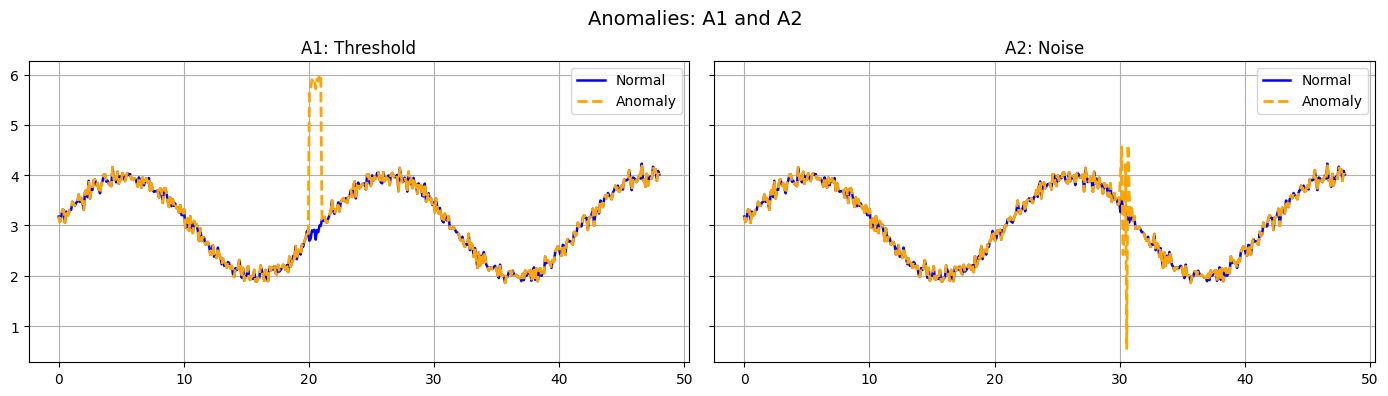

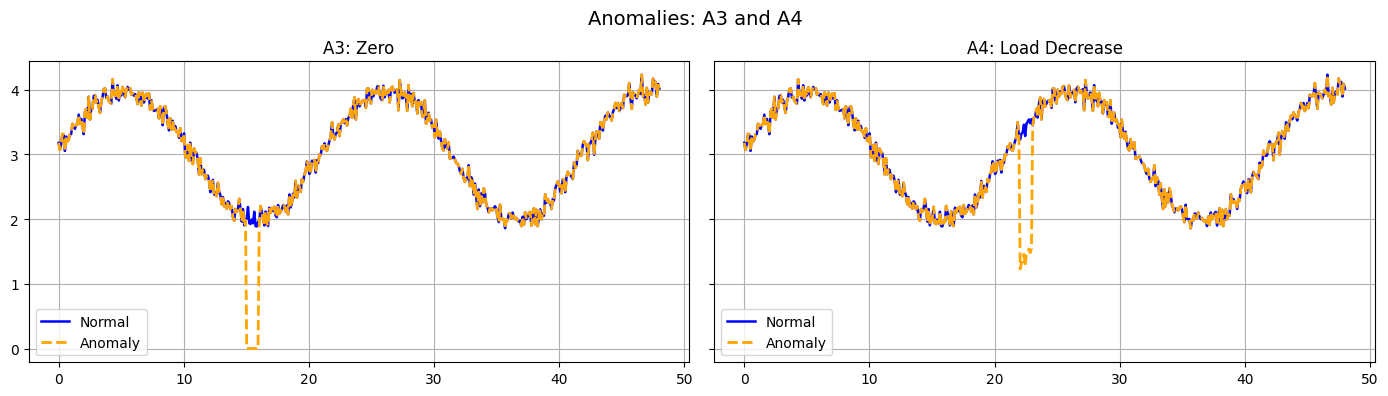

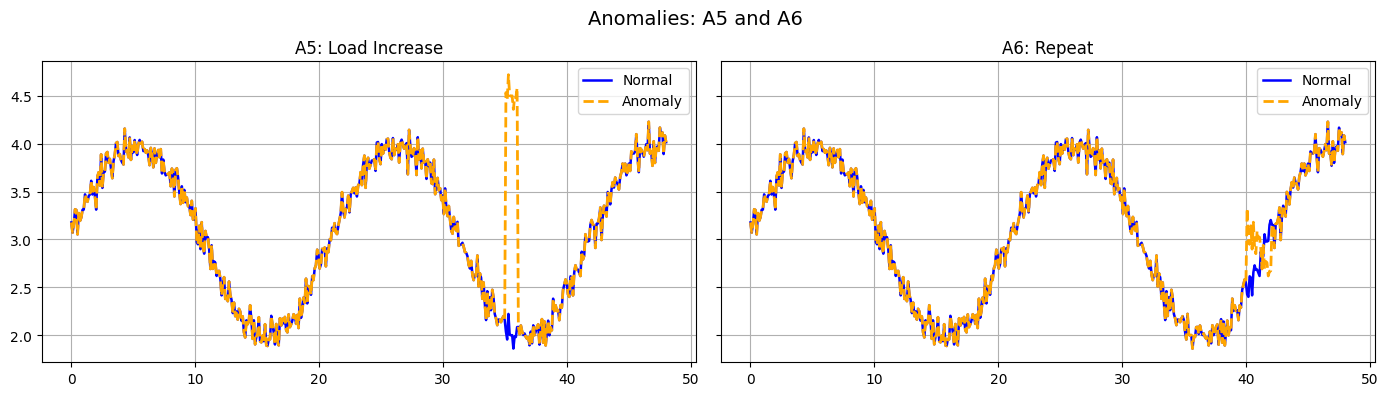

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
t = np.linspace(0, 48, 480)
normal = 3 + np.sin(0.3 * t) + np.random.normal(0, 0.1, len(t))

A1 = normal.copy()
A1[200:210] += 3

A2 = normal.copy()
A2[300:310] += np.random.normal(0, 1, 10)

A3 = normal.copy()
A3[150:160] = 0

A4 = normal.copy()
A4[220:230] -= 2

A5 = normal.copy()
A5[350:360] += 2.5

A6 = normal.copy()
A6[400:420] = normal[100:120]

groups = [
    ('A1: Threshold', A1, 'A2: Noise', A2),
    ('A3: Zero', A3, 'A4: Load Decrease', A4),
    ('A5: Load Increase', A5, 'A6: Repeat', A6)
]

for i, (title1, data1, title2, data2) in enumerate(groups):
    fig, ax = plt.subplots(1, 2, figsize=(14, 4), sharex=True, sharey=True)
    ax[0].plot(t, normal, label="Normal", color='blue', linewidth=1.8)
    ax[0].plot(t, data1, label="Anomaly", color='orange', linestyle='--', linewidth=2.0)
    ax[0].set_title(title1)
    ax[0].grid(True)
    ax[0].legend()
    ax[1].plot(t, normal, label="Normal", color='blue', linewidth=1.8)
    ax[1].plot(t, data2, label="Anomaly", color='orange', linestyle='--', linewidth=2.0)
    ax[1].set_title(title2)
    ax[1].grid(True)
    ax[1].legend()
    fig.suptitle(f"Anomalies: {title1.split(':')[0]} and {title2.split(':')[0]}", fontsize=14)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()
